# Today's Date - 24 June 2023
# Topic - Keras Hyperparameter Tuning

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

import keras_tuner as kt

In [8]:
df = pd.read_csv("/content/pima-indians-diabetes-database.csv")

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X, X.shape

(array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
          0.46849198,  1.4259954 ],
        [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
         -0.36506078, -0.19067191],
        [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
          0.60439732, -0.10558415],
        ...,
        [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
         -0.68519336, -0.27575966],
        [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
         -0.37110101,  1.17073215],
        [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
         -0.47378505, -0.87137393]]),
 (768, 8))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Keras Tuner will automate and find the best paramerter to train the model
example we can find, which acitvation function, optimizer, loss to use for best results

In [14]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 8))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
20/20 [==============================] - 1s 10ms/step - loss: 0.6769 - accuracy: 0.6010 - val_loss: 0.6508 - val_accuracy: 0.6494
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.6922 - val_loss: 0.6020 - val_accuracy: 0.7143
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7134 - val_loss: 0.5700 - val_accuracy: 0.7338
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.7362 - val_loss: 0.5432 - val_accuracy: 0.7922
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7541 - val_loss: 0.5236 - val_accuracy: 0.7857
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7704 - val_loss: 0.5097 - val_accuracy: 0.7922
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7720 - val_loss: 0.5009 - val_accuracy: 0.7922
Epoch 8/100


# Selecting approriate optimizer using Keras Tuner
in build_model, hp is default object we use to pass

In [16]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32, activation = 'relu', input_dim = 8))
  model.add(Dense(1,activation = 'sigmoid'))

  optimizer = hp.Choice('my_optimizer', values=['adam','sgd','rmsprop','adadelta'])

  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [18]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)

In [19]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Trial 4 Complete [00h 00m 01s]
val_accuracy: 0.6818181872367859

Best val_accuracy So Far: 0.7597402334213257
Total elapsed time: 00h 00m 06s


In [24]:
tuner.get_best_hyperparameters()[0].values

{'my_optimizer': 'adam'}

In [25]:
model = tuner.get_best_models(num_models=1)[0]

In [26]:
model.summary() #this model is trained on adam, as keras tuner found 'adam' as best option here

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, batch_size=32, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 [==============================] - 1s 15ms/step - loss: 0.5702 - accuracy: 0.7296 - val_loss: 0.5337 - val_accuracy: 0.7597
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5467 - accuracy: 0.7508 - val_loss: 0.5148 - val_accuracy: 0.7792
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5282 - accuracy: 0.7622 - val_loss: 0.5025 - val_accuracy: 0.7987
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5141 - accuracy: 0.7720 - val_loss: 0.4909 - val_accuracy: 0.8117
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7736 - val_loss: 0.4838 - val_accuracy: 0.7987
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.7752 - val_loss: 0.4772 - val_accuracy: 0.7987
Epoch 13/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7752 - val_loss: 0.4713 - val_accuracy: 0.7987
Epoch 14

### Now that we have found best optimizer for this model
# Now lets find number of neurons to put in our layer using Keras Tuner

In [32]:
def build_model(hp):
  model = Sequential()
  units = hp.Int('my_units', min_value=8, max_value=128, step=8) #first it will train on 8 neurons , then 16, then 24, till 128
  model.add(Dense(units=units, activation='relu', input_dim=8))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])
  return model

In [33]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='mydir')

In [34]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.7857142686843872

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 07s


In [35]:
tuner.get_best_hyperparameters()[0].values

{'my_units': 72}

In [36]:
model = tuner.get_best_models(num_models=1)[0]

In [37]:
model.summary() # keras tuner found 72 neurons will work as best

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 72)                648       
                                                                 
 dense_1 (Dense)             (None, 1)                 73        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X_train, y_train, batch_size=32, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 [==============================] - 1s 8ms/step - loss: 0.5065 - accuracy: 0.7671 - val_loss: 0.4813 - val_accuracy: 0.7922
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7736 - val_loss: 0.4705 - val_accuracy: 0.8052
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7785 - val_loss: 0.4645 - val_accuracy: 0.8117
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7834 - val_loss: 0.4614 - val_accuracy: 0.7987
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7866 - val_loss: 0.4590 - val_accuracy: 0.7987
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7818 - val_loss: 0.4572 - val_accuracy: 0.7922
Epoch 13/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7850 - val_loss: 0.4556 - val_accuracy: 0.7922
Epoch 14/

# Now we will find best number of layers of this data

In [39]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(72, activation='relu', input_dim=8))

  for i in range(hp.Int('my_layers', min_value=1, max_value=10)):
    model.add(Dense(72,activation='relu'))

  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])
  return model

In [40]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=3, directory='my_dir')

In [41]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 02s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 00m 06s


In [42]:
tuner.get_best_hyperparameters()[0].values

{'my_layers': 7}

In [43]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 72)                648       
                                                                 
 dense_1 (Dense)             (None, 72)                5256      
                                                                 
 dense_2 (Dense)             (None, 72)                5256      
                                                                 
 dense_3 (Dense)             (None, 72)                5256      
                                                                 
 dense_4 (Dense)             (None, 72)                5256      
                                                                 
 dense_5 (Dense)             (None, 72)                5256      
                                                                 
 dense_6 (Dense)             (None, 72)                5

In [44]:
model.fit(X_train, y_train, batch_size=32, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 [==============================] - 2s 11ms/step - loss: 0.4117 - accuracy: 0.8094 - val_loss: 0.5160 - val_accuracy: 0.7987
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4131 - accuracy: 0.8208 - val_loss: 0.4875 - val_accuracy: 0.8312
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3860 - accuracy: 0.8322 - val_loss: 0.5029 - val_accuracy: 0.8312
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3743 - accuracy: 0.8274 - val_loss: 0.5080 - val_accuracy: 0.7922
Epoch 11/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8518 - val_loss: 0.5192 - val_accuracy: 0.7922
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3686 - accuracy: 0.8371 - val_loss: 0.5191 - val_accuracy: 0.7987
Epoch 13/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.8453 - val_loss: 0.5440 - val_accuracy: 0.8052
Epoch 14

# Now at the last, we will find multiple things at once to get the best model

In [97]:
def build_model(hp):
  model = Sequential()
  counter = 0

  for i in range(hp.Int('lAyers', min_value=1, max_value=10)):
    if counter==0:
      model.add(
          Dense(
              hp.Int('uNits'+str(i), min_value=8, max_value=128, step=8),
              activation = hp.Choice('aCtivation'+str(i), values=['relu', 'sigmoid', 'tanh']),
              input_dim=8
          )
      )
      # model.add(Dense(hp.Choice('dRopout'+str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(
          Dense(
              hp.Int('uNits'+str(i), min_value=8, max_value=128, step=8),
              activation = hp.Choice('aCtivation'+str(i), values=['relu', 'sigmoid', 'tanh'])
          )
      )
      # model.add(Dense(hp.Choice('dRopout'+str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter+=1
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=hp.Choice('oPtimizer', values=['rmsprop', 'sgd', 'adam', 'nadam', 'adadelta']), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [98]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=3,
                        directory='name3',
                        project_name='name4')

In [99]:
tuner.search(X_train,y_train, epochs=5, validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 02s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.6428571343421936
Total elapsed time: 00h 00m 06s


In [100]:
tuner.get_best_hyperparameters()[0].values

{'lAyers': 2,
 'uNits0': 128,
 'aCtivation0': 'sigmoid',
 'oPtimizer': 'sgd',
 'uNits1': 8,
 'aCtivation1': 'relu'}

In [101]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,193
Trainable params: 2,193
Non-trainable params: 0
_________________________________________________________________


In [102]:
history = model.fit(X_train, y_train, epochs=200, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/200
20/20 [==============================] - 1s 8ms/step - loss: 0.6613 - accuracy: 0.6531 - val_loss: 0.6672 - val_accuracy: 0.6429
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.6531 - val_loss: 0.6637 - val_accuracy: 0.6429
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.6531 - val_loss: 0.6605 - val_accuracy: 0.6429
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6531 - val_loss: 0.6583 - val_accuracy: 0.6429
Epoch 11/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.6531 - val_loss: 0.6541 - val_accuracy: 0.6429
Epoch 12/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6531 - val_loss: 0.6515 - val_accuracy: 0.6429
Epoch 13/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6531 - val_loss: 0.6480 - val_accuracy: 0.6429
Epoch 14/

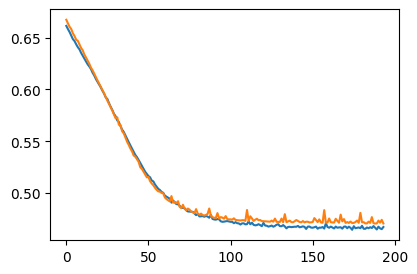

In [103]:
plt.figure(figsize=(4.5,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])